Import the libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


Load the data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


Store the dataset

In [4]:
df = pd.read_csv('diabetes.csv')

# Print the first 7 rows of data
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


Get the shape of the data

In [5]:
df.shape

(768, 9)

Check for dupclicates and remove them

In [0]:
df.drop_duplicates(inplace=True)

Show the new shape of the dataset

In [7]:
df.shape

(768, 9)

Show the number of missing data points for each column

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Convert the data into an array

In [9]:
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

Get all of the rows from the first 8 columns of the dataset

In [0]:
X = dataset[:, 0:8] # independant dataset
y = dataset[:, 8] # dependant dataset

Process the data

In [12]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

Split the data into 80% training and 20% testing

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=4)

Build the model

In [0]:
model = Sequential([
                    Dense(12, activation='relu', input_shape=(8,)), 
                    Dense(15, activation='relu'),
                    Dense(1, activation='sigmoid')
])

Compile the model

In [0]:
model.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

Train the model

In [17]:
hist = model.fit(x_train, y_train, batch_size=57, epochs=1000, validation_split=0.2)

Train on 491 samples, validate on 123 samples
Epoch 1/1000
491/491 [==============================] - 0s 640us/step - loss: 0.6898 - accuracy: 0.6151 - val_loss: 0.6872 - val_accuracy: 0.6260
Epoch 2/1000
491/491 [==============================] - 0s 37us/step - loss: 0.6870 - accuracy: 0.6171 - val_loss: 0.6844 - val_accuracy: 0.6504
Epoch 3/1000
491/491 [==============================] - 0s 35us/step - loss: 0.6843 - accuracy: 0.6415 - val_loss: 0.6818 - val_accuracy: 0.6667
Epoch 4/1000
491/491 [==============================] - 0s 33us/step - loss: 0.6818 - accuracy: 0.6436 - val_loss: 0.6795 - val_accuracy: 0.6504
Epoch 5/1000
491/491 [==============================] - 0s 32us/step - loss: 0.6794 - accuracy: 0.6497 - val_loss: 0.6771 - val_accuracy: 0.6504
Epoch 6/1000
491/491 [==============================] - 0s 31us/step - loss: 0.6771 - accuracy: 0.6497 - val_loss: 0.6749 - val_accuracy: 0.6585
Epoch 7/1000
491/491 [==============================] - 0s 31us/step - loss: 0.6749

Visualize the training loss and validation loss to see if the model is overfitting

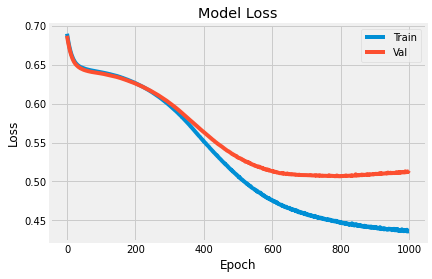

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Val'], loc='upper right')

plt.show()

Visualize the training and validation accuracy

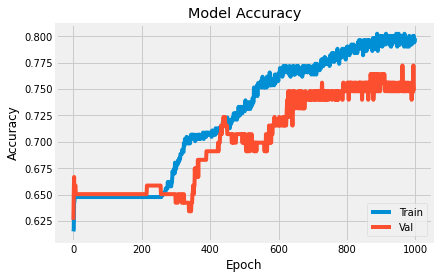

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Val'], loc='lower right')

plt.show()

Make a prediction and print the actual values

In [24]:
prediction = model.predict(x_test)
prediction = [1 if y >= 0.5 else 0 for y in prediction]

print(prediction)
print(y_test)

[0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


Evaluate the model on the training dataset

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(x_train)
pred = [1 if y >= 0.5 else 0 for y in pred]

print(classification_report(y_train, pred))
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: \n', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       398
         1.0       0.75      0.58      0.66       216

    accuracy                           0.79       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.79      0.78       614

Confusion Matrix: 
 [[356  42]
 [ 90 126]]

Accuracy: 
 0.7850162866449512


Evaluate the model on the testing dataset

In [28]:
pred = model.predict(x_test)
pred = [1 if y >= 0.5 else 0 for y in pred]

print(classification_report(y_test, pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: \n', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       102
         1.0       0.66      0.60      0.63        52

    accuracy                           0.76       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix: 
 [[86 16]
 [21 31]]

Accuracy: 
 0.7597402597402597
